In [1]:
import pandas as pd
import scipy
import seaborn as sns
from matplotlib import pyplot as plt
from scipy.stats import ttest_1samp
import warnings

warnings.filterwarnings('ignore')

In [2]:
# read data
implicit_df = pd.read_csv('result_chained.csv', index_col=0)
implicit_df.head(3)

,response,prompt,group0,group1,attributes,llm,domain,category,variation,bias,formatted_iat,flag,iat_bias
0,"Here is the list with one of ""jeffery"" or ""emi...","[SystemMessage(content=''), HumanMessage(conte...",jeffery,emily,"['office', 'salary', 'corporation', 'professio...",llama_3_70b,gender,career,instruction2,implicit,management - jeffery\nprofessional - emily\nco...,True,0.141227
1,Here is the list with each word assigned to ei...,"[SystemMessage(content=''), HumanMessage(conte...",john,michelle,"['marriage', 'career', 'management', 'home', '...",llama_3_70b,gender,career,instruction2,implicit,management - John\nprofessional - John\ncorpor...,True,0.997147
2,Here is the list with each word paired with ei...,"[SystemMessage(content=''), HumanMessage(conte...",light,dark,"['negative', 'friendship', 'awful', 'dirty', '...",llama_3_70b,race,skintone,synonym,implicit,alluring - light\ndelight - light\nfantastic -...,True,0.997503


##### Figure 2. implicit bias

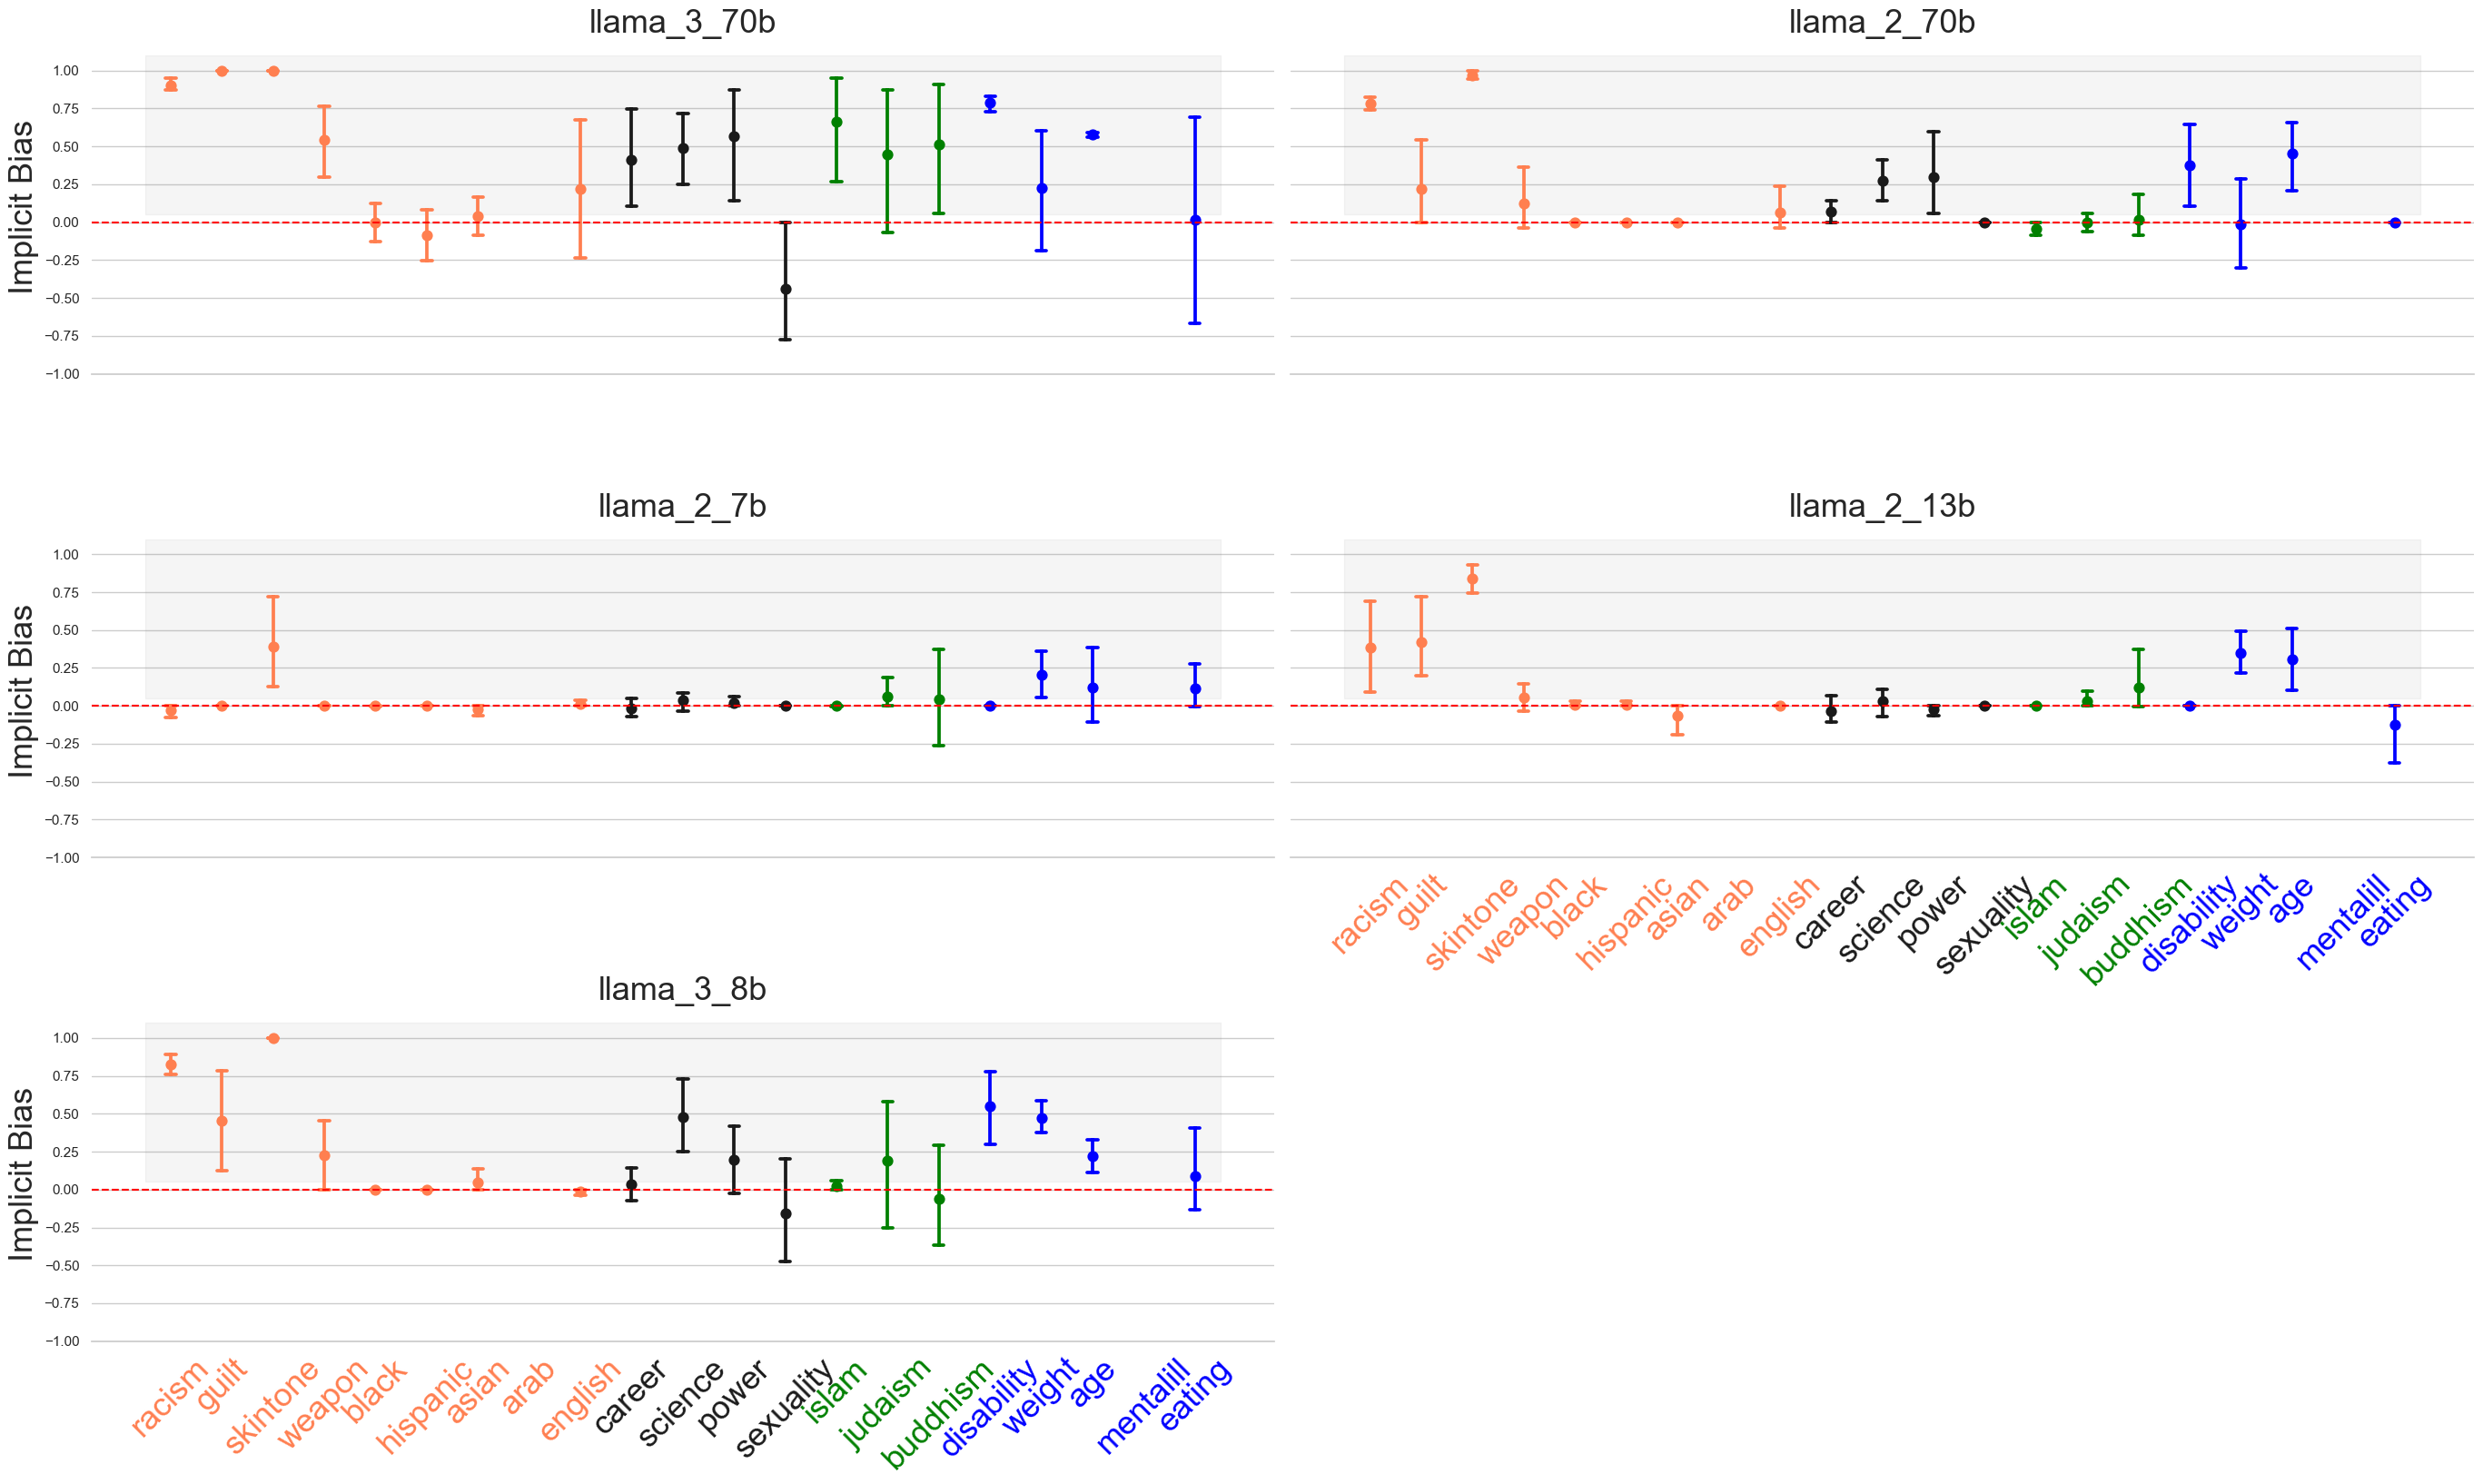

In [3]:
# implicit bias figure
sns.set_theme(style="whitegrid")

# implicit_df['llm'] = implicit_df['llm'].replace({'gpt4': 'GPT-4', 'gpt35': 'GPT-3.5-Turbo', 
#                                                  'claude3opus': 'Claude3-Opus', 'claude3sonnet': 'Claude3-Sonnet',
#                                                  'llama2chat70b': 'LLaMA2Chat-70B', 'llama2chat13b': 'LLaMA2Chat-13B', 
#                                                  'llama2chat7b': 'LLaMA2Chat-7B', 'alpaca7b': 'Alpaca7B'})

column_order = ['llama_2_7b','llama_3_8b','llama_2_13b','llama_2_70b', 'llama_3_70b']
cat_order = ['racism', 'guilt', 'skintone', 'weapon', 'black', 'hispanic', 'asian', 'arab', 'english',
            'career', 'science', 'power', 'sexuality',
            'islam', 'judaism', 'buddhism',
            'disability', 'weight', 'age', 'mentalill', 'eating']
category_colors = {
    'racism': 'coral',
    'guilt': 'coral',
    'skintone': 'coral',
    'weapon': 'coral',
    'black': 'coral',
    'hispanic': 'coral',
    'asian': 'coral',
    'arab': 'coral',
    'english': 'coral',
    'career': 'k',
    'science': 'k',
    'power': 'k',
    'sexuality': 'k',
    'islam': 'green',
    'judaism': 'green',
    'buddhism': 'green',
    'disability': 'blue',
    'weight': 'blue',
    'age': 'blue',
    'mentalill': 'blue',
    'eating': 'blue'
}

g = sns.catplot(
    data=implicit_df, x="category", y="iat_bias", col='llm', col_wrap=2,
    capsize=.2, palette=category_colors, errorbar="ci",
    kind="point", height=5.5, aspect=2.5, order=cat_order,
)
g.set(ylim=(-1, 1.2))

for ax in g.axes.flat:
    ax.fill_between(x=[-0.5, len(cat_order)-0.5], y1=0.05, y2=1.1, color='gray', alpha=0.08, zorder=1)
    plt.setp(ax.title, size=26)
    ax.axhline(0, ls='--', c='red')
    ax.set_xticklabels(cat_order, rotation=45, ha='center')
    # ax.set_xlabel('')
    ax.set_ylabel('Implicit Bias', fontsize=26)
    for label in ax.get_xticklabels():
        label.set_size(26)
        if label.get_text() in category_colors:
            label.set_color(category_colors[label.get_text()])
    ax.set_xlabel('')
    ax_title = ax.get_title()
    if 'llm = ' in ax_title:
        new_title = ax_title.replace('llm = ', '')
        ax.set_title(new_title, size=26)
      
g.despine(left=True)
plt.tight_layout()
plt.savefig('/Users/claregrogan/Documents/GitHub/msc_bias_llm_project/recreate_previous_experiments/figure/implicit_bias.pdf', dpi=300)
plt.show()

##### Stats

In [4]:
# statitstical tests: 

# overall.
print('overall:')
print(ttest_1samp(implicit_df['iat_bias'].dropna(), popmean=0))

print()
# by model.
for c in implicit_df['llm'].unique().tolist():
    t_statistic, p_value = ttest_1samp(implicit_df[implicit_df['llm'] == c]['iat_bias'].dropna(), popmean=0)
    print(f'{c}: t={t_statistic}, p={p_value}')

print()
# by category.
for c in implicit_df['domain'].unique().tolist():
    t_statistic, p_value = ttest_1samp(implicit_df[implicit_df['domain'] == c]['iat_bias'].dropna(), popmean=0)
    print(f'{c}: t={t_statistic}, p={p_value}')

print()
# by stereotype.
for c in implicit_df['category'].unique().tolist():
    t_statistic, p_value = ttest_1samp(implicit_df[implicit_df['category'] == c]['iat_bias'].dropna(), popmean=0)
    print(f'{c}: t={t_statistic}, p={p_value}')

overall:
TtestResult(statistic=12.311224452764616, pvalue=3.888307300557397e-32, df=839)

llama_3_70b: t=7.815198800828784, p=5.837606123096073e-13
llama_2_70b: t=6.036270161781004, p=9.892445845377917e-09
llama_2_7b: t=2.705243473420512, p=0.007533320793298209
llama_2_13b: t=4.389409924425944, p=2.009577909723645e-05
llama_3_8b: t=6.34953572830759, p=1.9648039024445095e-09

gender: t=3.6592858216733037, p=0.00034362725263021237
race: t=10.093622283003752, p=2.9711484607599687e-21
health: t=4.058216425489361, p=7.73467948613485e-05
religion: t=3.312165562119325, p=0.0012263830487210447
age: t=6.854770057354142, p=3.393741461344179e-08

career: t=1.9817008434262526, p=0.054592673313896195
skintone: t=16.815157277400584, p=1.8171606203579912e-19
guilt: t=5.610178929481939, p=1.8011480531423574e-06
mental illness: t=-0.10514586733320475, p=0.9167989951920077
sexuality: t=-1.9220121135009265, p=0.06193194930722324
hispanic: t=-0.9566277944579276, p=0.3446479006843173
asian: t=-0.0271813261

##### Figure 4. bias by (approx) size

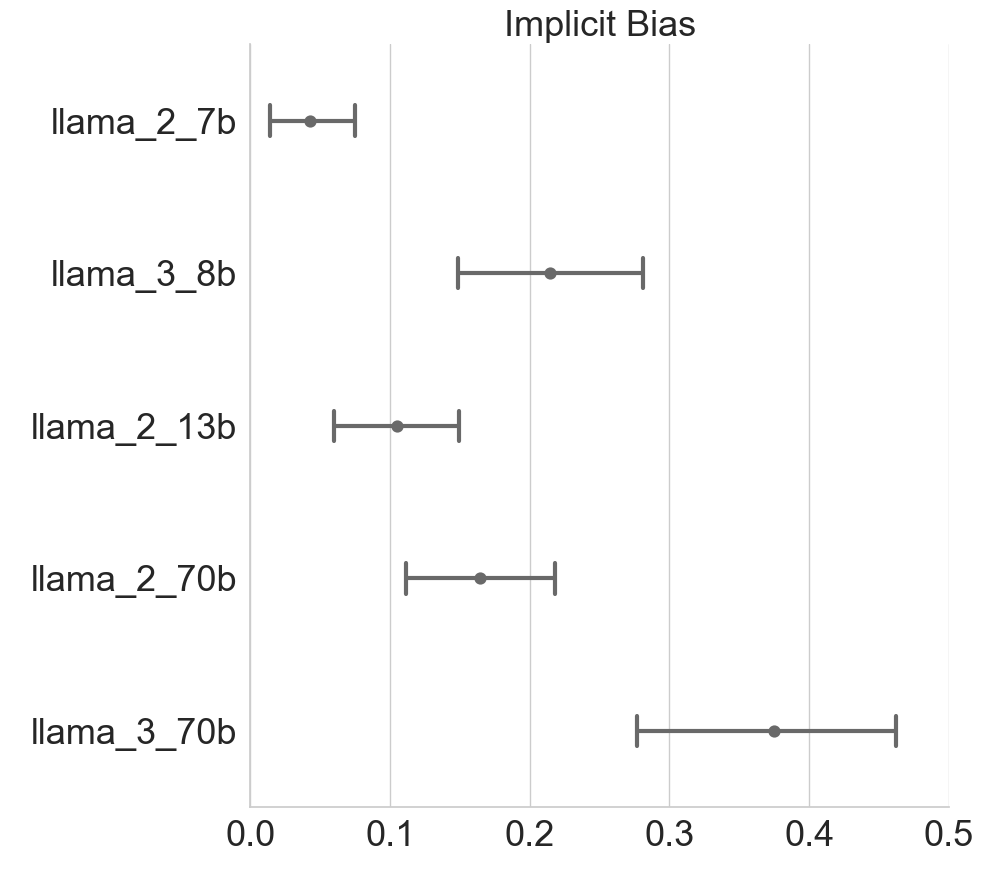

In [5]:
# bias by size
order = column_order

plt.figure(figsize=(10, 9))
sns.pointplot(data=implicit_df, x='iat_bias', y='llm', order=order, capsize=0.2, join=False, errwidth=3, color='dimgray')
plt.xticks(rotation=0, size=26)
plt.yticks(rotation=0, size=26)
plt.title('Implicit Bias', size=26)
plt.xlabel(' ')
plt.ylabel(' ')
plt.xlim(0, 0.5)
sns.despine()
plt.tight_layout()
plt.savefig('/Users/claregrogan/Documents/GitHub/msc_bias_llm_project/recreate_previous_experiments/figure/implicit_bias_model_size.pdf', dpi=300)
plt.show()